# Sklearn statistical machine learning

## Train test split, Standardize (columns) and normalize (rows)

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [59]:
n = 10000
p = 40
rng = np.random.RandomState(8888)
x_mat = rng.normal(size=(n,p))
beta_true = rng.normal(size = p)
y = np.dot(x_mat,beta_true) + rng.normal(size=n)

(array([  22.,  158.,  658., 1704., 2741., 2637., 1465.,  505.,   89.,
          21.]),
 array([-21.44136517, -17.06860753, -12.69584989,  -8.32309224,
         -3.9503346 ,   0.42242304,   4.79518068,   9.16793833,
         13.54069597,  17.91345361,  22.28621125]),
 <BarContainer object of 10 artists>)

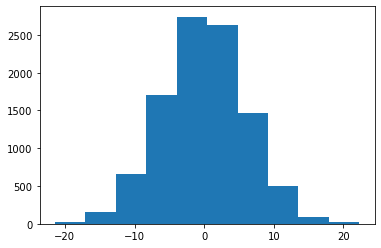

In [60]:
plt.hist(y)

In [61]:
## make random class
z = np.zeros_like(y)
z[y>10] = 3
z[y<-10] = 2

__`stratify`__: classification label

In [62]:
tr_X, ts_X, tr_Y, ts_Y = train_test_split(x_mat,y,test_size=0.2,random_state =0)

In [63]:
tr_X, ts_X, tr_z, ts_z = train_test_split(x_mat,z,test_size=0.2,random_state =0,stratify=z)

In [64]:
print(sum(tr_z==3)/len(tr_z),sum(ts_z==3)/len(ts_z))

0.0465 0.0465


In [65]:
print(sum(tr_z==2)/len(tr_z),sum(ts_z==2)/len(ts_z))

0.048625 0.0485


In [66]:
print(sum(tr_z==0)/len(tr_z),sum(ts_z==0)/len(ts_z))

0.904875 0.905


#### `StandardScaler` defaults `with_mean=True` and  `with_std=True` can be adjusted

In [67]:
standardizer = StandardScaler().fit(tr_X)
tr_X = standardizer.transform(tr_X)
ts_X = standardizer.transform(ts_X)

In [68]:
tr_X.mean(axis=0)

array([-2.57576079e-17,  3.62487818e-17,  3.78239107e-17, -1.78329573e-18,
       -1.99840144e-18, -2.88380431e-17, -6.97497615e-17, -3.85247390e-17,
       -8.18789481e-18,  3.36952688e-17,  8.84015083e-18,  7.82728916e-17,
       -3.38062911e-17, -3.20021787e-17, -3.61516372e-18, -1.12132525e-17,
        2.85604873e-17, -3.18911564e-17,  1.92484917e-17,  2.15938378e-17,
       -5.09314813e-17, -2.77555756e-19, -3.46944695e-18, -4.95298247e-17,
        7.60502772e-18, -1.37390099e-17, -2.04974926e-17, -1.00336406e-17,
        3.06005221e-18, -1.61988478e-17,  8.38218384e-18,  4.79200013e-17,
       -2.23709939e-17,  6.65023592e-17, -2.62984079e-17, -2.89490654e-17,
        2.68396416e-17,  2.70616862e-17, -1.72570291e-17,  3.37299633e-17])

In [69]:
tr_X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

#### `Normalizer` default is `l2`, `l1` and `max` are available

In [70]:
normalizer = Normalizer().fit(tr_X)
tr_X_norm = normalizer.transform(tr_X)
ts_X_norm = normalizer.transform(ts_X)

In [79]:
np.sqrt(np.sum(tr_X_norm**2,axis=1)).sum() == tr_X_norm.shape[0]

True

In [80]:
np.sqrt(np.sum(tr_X_norm**2,axis=1)).sum() == tr_X_norm.shape[0]

True

## Naive Bayes

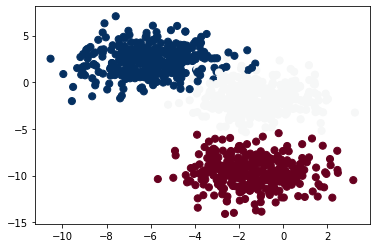

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(1000, 3, centers=3, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

### `Gaussian`, `multinomial` and `Categorical`. `Complement Naive Bayes` is for imblanced `multinomial`. Except for `Gaussian`, the rest are for counts data, popular in text classification and simple NLP.

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
tr_X, ts_X, tr_Y, ts_Y = train_test_split(X,y,test_size=0.2,random_state =0)
model.fit(tr_X, tr_Y)
predicted_y = model.predict(ts_X);

### Classification results: `classification_report` and `confusion_matrix`

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ts_Y,predicted_y)

#### true is y-axis and predicted is x-axis

In [32]:
mat

array([[60,  0,  0],
       [ 1, 64,  1],
       [ 0,  2, 72]], dtype=int64)

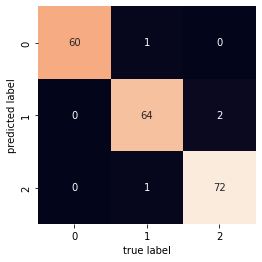

In [30]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
from sklearn.metrics import classification_report
print(classification_report(predicted_y, ts_Y))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.97      0.97      0.97        66
           2       0.97      0.99      0.98        73

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

